# CNN (Fashion MNIST)

In [1]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
K = len(set(y_train))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5185 - accuracy: 0.8081 - val_loss: 0.4018 - val_accuracy: 0.8452
Epoch 2/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3539 - accuracy: 0.8666 - val_loss: 0.3508 - val_accuracy: 0.8683
Epoch 3/15
60000/60000 [==============================] - 4s 58us/sample - loss: 0.3073 - accuracy: 0.8848 - val_loss: 0.3335 - val_accuracy: 0.8766
Epoch 4/15
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2768 - accuracy: 0.8954 - val_loss: 0.3174 - val_accuracy: 0.8810
Epoch 5/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2532 - accuracy: 0.9048 - val_loss: 0.3008 - val_accuracy: 0.8890
Epoch 6/15
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2319 - accuracy: 0.9117 - val_loss: 0.3083 - val_accuracy: 0.8936
Epoch 7/15
60000/60000 [==============================] 

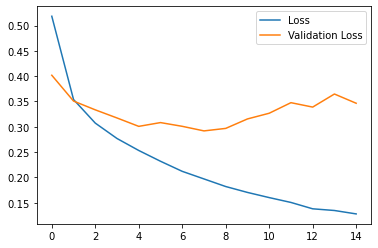

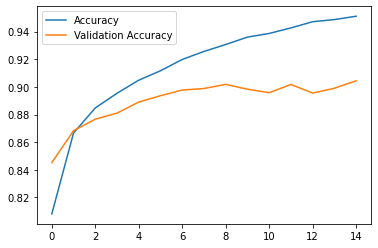

10000/10000 [==============================] - 0s 40us/sample - loss: 0.3465 - accuracy: 0.9044
Accuracy: 0.9043999910354614


In [4]:
i = tf.keras.layers.Input(shape=X_train[0].shape)
x = tf.keras.layers.Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(K, activation='softmax')(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=15)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')

## Plot the confusion matrix

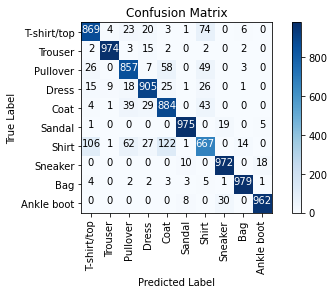

In [5]:
def plot_confusion_matrix(cm, labels):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    num_classes = len(labels)
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, labels, rotation=90)
    plt.yticks(tick_marks, labels)
    
    threshold = cm.max() / 2
    for i, j in itertools.product(range(num_classes), range(num_classes)):
        plt.text(j, i, cm[i, j],
                 ha='center',
                 color='white' if cm[i, j] > threshold else 'black')

    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


labels = [
    'T-shirt/top', 
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot',
]

p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, labels)

## Display a random misclassified image

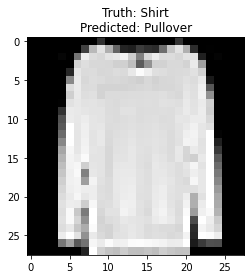

In [6]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
plt.title(f'Truth: {labels[y_test[i]]}\nPredicted: {labels[p_test[i]]}')
plt.show()